# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [89]:
# Given our model score, why did we choose the model with a either a higher F1 Score, or accuracy score, T-score or the Precision score 

# Import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LinearRegression



In [90]:
# Read the data into a dataframe
df = pd.read_csv('datasets/data.csv')
df.shape
df.columns


Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [91]:

# Chekcing the first 5 data sets
df.head()



,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [92]:
# Separate the features (x) and the target variable (y)

y = df[' Gross Profit to Sales']
x = df.drop(columns=[' Gross Profit to Sales'])

# Split the dataset into training and test data
x_train, x_test, y_train, y_test = train_test_split(x,y)

# Initialize the scaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform it

x_trained_scaled = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test= scaler.fit_transform(x_test)

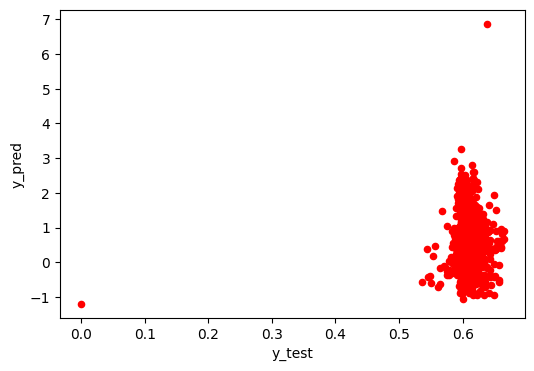


R2 (Linear Regression) = {:.3f} 0.9999999835651119

R2 (Linear Regression) = {:.3f} 0.9999999803854306

R2 (Linear Regression) = {:.3f} 0.6116127696830194


In [93]:
# 1. LinearRegression() -> this applies mean centering internally to the data 

model = LinearRegression()
model.fit(x_trained_scaled, y_train)
y_pred = model.predict(x_test)

# Visually check the predicted and actual y values ​​of the test data.

plt.figure(figsize= (6,4))
plt.scatter(y_test, y_pred, s=20, c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()
# Calculate the R2 score
r2 = model.score(x_trained_scaled, y_train)
print('\nR2 (Linear Regression) = {:.3f}',format(r2))

# 2. Ridge regularization

model = Ridge(alpha = 0.01)
model.fit(x_trained_scaled, y_train)
r2 = model.score(x_trained_scaled, y_train)
print('\nR2 (Linear Regression) = {:.3f}',format(r2))
# 3. Lasso regularization
model = Lasso(alpha = 0.01)
model.fit(x_trained_scaled, y_train)
r2 = model.score(x_trained_scaled, y_train)
print('\nR2 (Linear Regression) = {:.3f}',format(r2))

In [94]:
# # This for logical Regression (Not Applicable as there is continous value)
# REG_CONST = 0.01

# # Create a model and fit it to the training data.
# # C := inverse of regularization strength
# model = LogisticRegression(penalty='l2', C=1./REG_CONST, max_iter=300)
# model.fit(x_trained_scaled, y_train)

# # Predict the classes of test data and measure the accuracy of test data
# y_pred = model.predict(x_trained_scaled)
# acc = (y_pred == y_test).mean()
# print('\nAccuracy of test data = {:.3f}'.format(acc))

In [95]:
#Let's load in the iris dataset, MultiClass Regression

iris = load_iris(as_frame=True)
x = iris.data 
y = iris.target

In [96]:
# Split the data into the training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# regularization constant (strength)
REG_CONST = 0.01

# Create a model and fit it to the training data.
# C := inverse of regularization strength, stronger regularization with smaller values
model = LogisticRegression(multi_class='multinomial', penalty='l2', C=1./REG_CONST, max_iter=300) 
model.fit(x_train_scaled, y_train)

# Predict the classes of test data and measure the accuracy of test data
y_pred = model.predict(x_test_scaled)
acc = (y_pred == y_test).mean()
print('\nAccuracy of test data = {:.3f}'.format(acc))


Accuracy of test data = 1.000


/Users/belinda/Desktop/MY-DAC-Curriculum/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


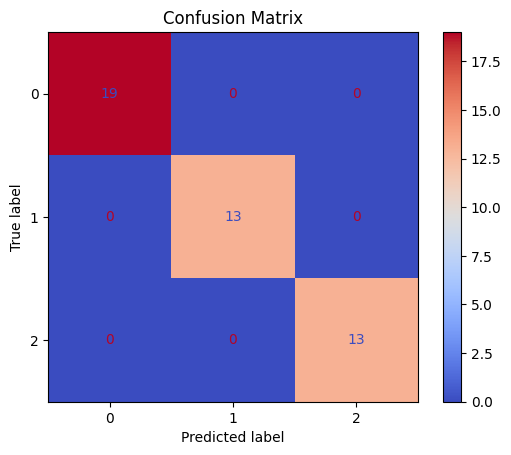

F1 Score: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [97]:
# Get prediction probabilities
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.3f}')

# Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [98]:
# Processing steps (For CART)

df.fillna({' Gross Profit to Sales': df[' Gross Profit to Sales'].mean(), ' Operating Gross Margin': df[' Operating Gross Margin'].mode()[0],' Non-industry income and expenditure/revenue':df[' Non-industry income and expenditure/revenue'].mean()}, inplace=True)  
# df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True) dont think we need to drop any coloumns 

df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


DecisionTreeClassifier: accuracy = 0.964


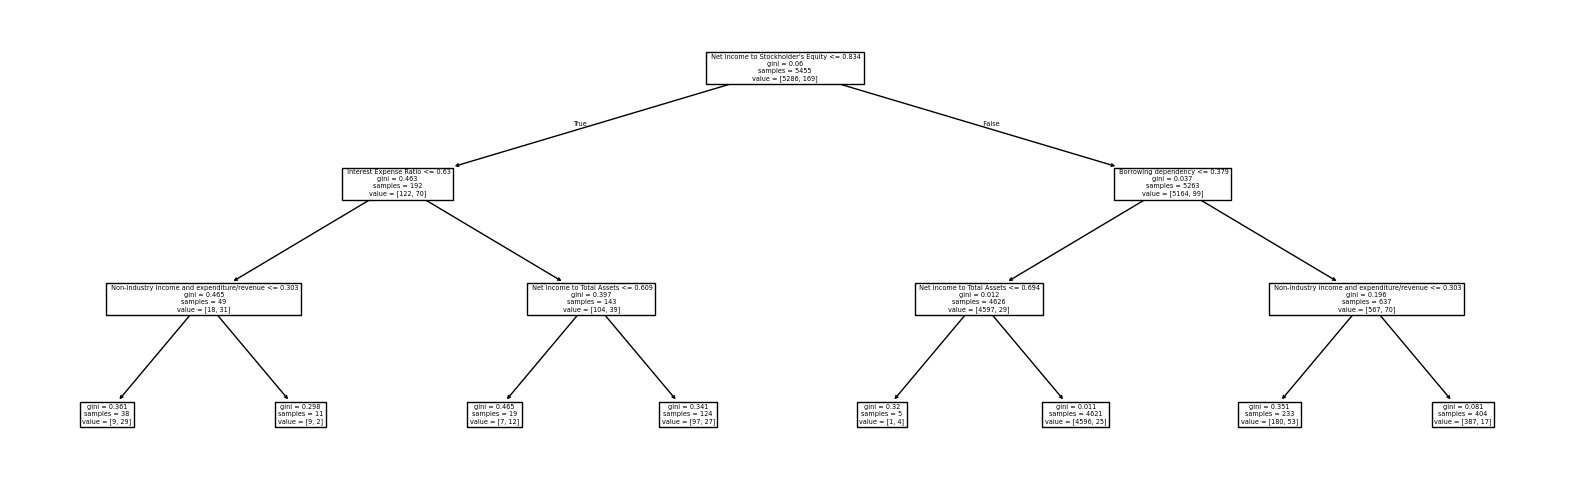

In [99]:
#For CART

y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)
depth = 3 # depth of the tree


# perform your train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sk_model = DecisionTreeClassifier(max_depth=depth, 
                                  random_state=1)
sk_model.fit(x_train, y_train)
sk_pred = sk_model.predict(x_test)
acc = (y_test == sk_pred).mean()
print('DecisionTreeClassifier: accuracy = {:.3f}'.format(acc))

# plotting 
feature_names = x.columns.tolist()
plt.figure(figsize=(20, 6))
tree.plot_tree(sk_model,
               feature_names=feature_names)
plt.show()



In [100]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Depth = 1, train_acc = 0.9696, eval_acc = 0.9599
Depth = 2, train_acc = 0.9719, eval_acc = 0.9599
Depth = 3, train_acc = 0.9726, eval_acc = 0.9599
Depth = 4, train_acc = 0.9767, eval_acc = 0.9589
Depth = 5, train_acc = 0.9803, eval_acc = 0.9521
Depth = 6, train_acc = 0.9862, eval_acc = 0.9570
Depth = 7, train_acc = 0.9891, eval_acc = 0.9570
Depth = 8, train_acc = 0.9918, eval_acc = 0.9560


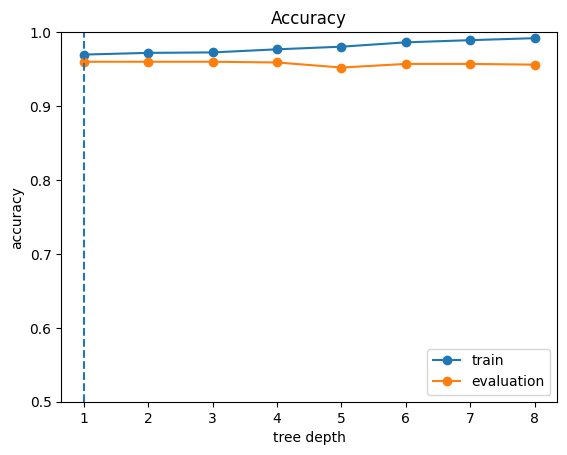

In [101]:
# Separate the data into features and target class.
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

# Split the data into training, validation and test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size = 0.5)

# Create decision tree models of various depths, 
# and measure the accuracy of validation data for each model.
train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth+1):
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(x_train, y_train)
    
    # Measure the accuracy of this model using the training data.
    y_pred = model.predict(x_train)
    train_acc.append((y_pred == y_train).mean())

    # Measure the accuracy of this model using the validation data.
    y_pred = model.predict(x_eval)
    eval_acc.append((y_pred == y_eval).mean())
    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))

# Find the optimal depth with the highest accuracy of validation data.
opt_depth = np.argmax(eval_acc) + 1

# Visualize accuracy changes as depth changes.
plt.plot(train_acc, marker='o', label='train')
plt.plot(eval_acc, marker='o', label='evaluation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5, 1.0)
plt.show()

Optimal depth = 1, test_acc = 0.9668


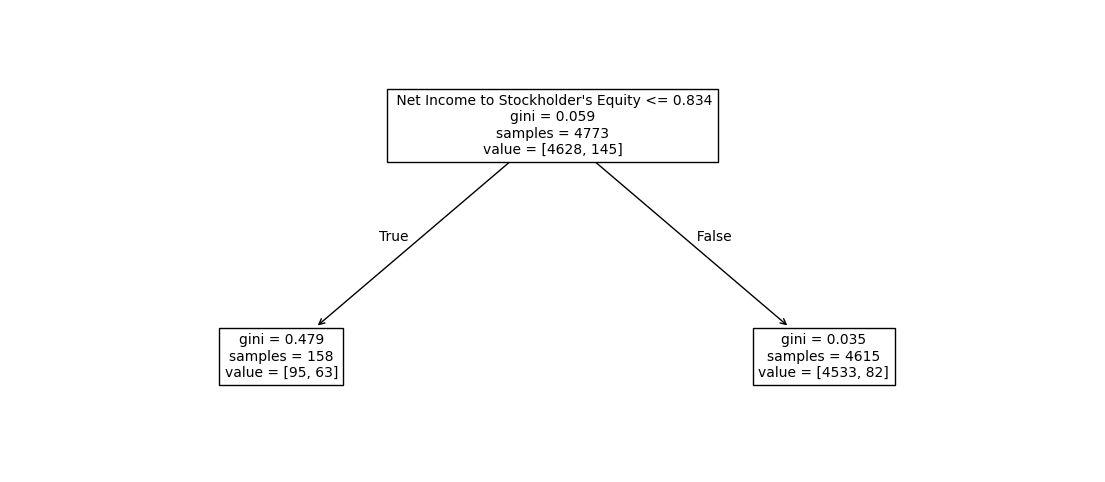

In [104]:
# I set max_step=1 as a constant value for tree visualization.
model = DecisionTreeClassifier(max_depth=1)
model.fit(x_train, y_train)

# Use test data to evaluate final performance.
y_pred = model.predict(x_test)
test_acc = (y_pred == y_test).mean()
print('Optimal depth = {}, test_acc = {:.4f}'.format(opt_depth, test_acc))
        
# Visualize the tree
# plt.figure(figsize=(20,10))
feat_names = x.columns.tolist()
plt.figure(figsize=(14,6))
tree.plot_tree(model, feature_names = feat_names, fontsize=10)
plt.show()

